<a href="https://colab.research.google.com/github/Imran012x/Android-Studio-Lab/blob/master/2_CNN%2BEfficientNetB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('')



# with zipfile.ZipFile('/content/drive/MyDrive/sardin.zip', 'r') as zip_ref:
#     zip_ref.extractall('')
# with zipfile.ZipFile('/content/drive/MyDrive/chandana.zip', 'r') as zip_ref:
#     zip_ref.extractall('')


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split


common_pic= os.listdir('/content/common')
print(common_pic[0:5])
print(common_pic[-5:])


painted_pic= os.listdir('/content/painted/')


red_based_pic= os.listdir('/content/red_based/')


red_spot_pic= os.listdir('/content/red_spot/')



['medium236.jpeg', 'medium32.jpg', 'Delias20eucharis_1670910894_241815.jpg', 'medium198.jpeg', 'medium194.jpeg']
['37DeliasEucharis_KSaji_ac658.jpg', '42DeliasEucharis_KSaji_ac663.jpg', 'Delias20eucharis_1702209011_261945.jpg', '1167_50426-664-5e2e818695768-1.jpg', 'medium77.jpg']


In [3]:
print('Common  Jezebel_Delias eucharis images:', len(common_pic))
print('Painted Jezebel_Delias hyparete images:', len(painted_pic))
print('Red-Based  Jezebel_Delias pasithoe images:', len(red_based_pic))
print('Red-Spot Jezebel_Delias descombesi images:', len(red_spot_pic))

Common  Jezebel_Delias eucharis images: 617
Painted Jezebel_Delias hyparete images: 897
Red-Based  Jezebel_Delias pasithoe images: 1154
Red-Spot Jezebel_Delias descombesi images: 690


In [4]:
# create the labels
# common_pic_labels = [0]*455
# painted_pic_labels = [1]*869
# red_based_pic_labels = [2]*1090
# red_spot_pic_labels = [3]*690


common_pic_labels = [0]*617
painted_pic_labels = [1]*897
red_based_pic_labels = [2]*1154
red_spot_pic_labels = [3]*690


print(common_pic_labels[0:5])

print(painted_pic_labels[0:5])

print(red_based_pic_labels[0:5])

print(red_spot_pic_labels[0:5])


[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]
[3, 3, 3, 3, 3]


In [5]:
print(len(common_pic_labels))
print(len(painted_pic_labels))
print(len(red_based_pic_labels))
print(len(red_spot_pic_labels))


labels = common_pic_labels + painted_pic_labels + red_based_pic_labels + red_spot_pic_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

617
897
1154
690
3358
[0, 0, 0, 0, 0]
[3, 3, 3, 3, 3]


In [6]:
import random
import os
from PIL import Image
import numpy as np

# Parameters (set different numbers for each class)
common_image_number = 617
painted_image_number = 897
red_based_image_number = 1154
red_spot_image_number = 690


# Initialize the list to store the images
data = []

def process_images(image_path, image_number):
    image_labels = sorted(os.listdir(image_path))  # Ensure images are in order
    random.shuffle(image_labels)  # Shuffle to get random ones
    selected_images = []
    for img_file in image_labels[:image_number]:
        image = Image.open(os.path.join(image_path, img_file))
        image = image.resize((224, 224))
        image = image.convert('RGB')
        image = np.array(image)
        selected_images.append(image)
    return selected_images

# Process images for each category
data.extend(process_images('/content/common/', common_image_number))
data.extend(process_images('/content/painted/', painted_image_number))
data.extend(process_images('/content/red_based/', red_based_image_number))
data.extend(process_images('/content/red_spot/', red_spot_image_number))

In [7]:
# Convert labels to numpy array for easy processing
labels = np.array(labels)

# Count the number of images in each class
unique, counts = np.unique(labels, return_counts=True)

# Print the number of images for each class
class_counts = dict(zip(unique, counts))
print(f"Class counts: {class_counts}")
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)
print(X.shape)
print(Y.shape)



Class counts: {0: 617, 1: 897, 2: 1154, 3: 690}
(3358, 224, 224, 3)
(3358,)


(3358, 224, 224, 3) (2686, 224, 224, 3) (672, 224, 224, 3)


array([[[216, 214, 211],
        [219, 213, 211],
        [218, 211, 208],
        ...,
        [249, 250, 248],
        [250, 250, 248],
        [250, 250, 248]],

       [[213, 206, 203],
        [209, 202, 199],
        [201, 194, 191],
        ...,
        [251, 251, 249],
        [251, 251, 247],
        [251, 251, 248]],

       [[209, 204, 200],
        [197, 193, 192],
        [183, 179, 179],
        ...,
        [252, 252, 250],
        [252, 253, 248],
        [252, 252, 248]],

       ...,

       [[ 83,  99,  95],
        [ 85, 100,  97],
        [ 85, 100,  96],
        ...,
        [ 17,  18,  13],
        [ 18,  19,  16],
        [ 10,  11,   9]],

       [[ 85, 101,  98],
        [ 86, 101,  98],
        [ 81,  96,  92],
        ...,
        [ 30,  30,  27],
        [ 28,  28,  27],
        [ 24,  24,  23]],

       [[ 87, 104,  99],
        [ 86, 102,  97],
        [ 81,  96,  90],
        ...,
        [ 30,  29,  25],
        [ 25,  24,  23],
        [ 27,  27,  24]]], dtype=uint8)
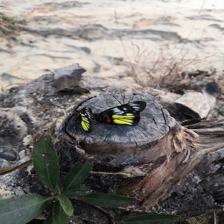

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

X_train[0]

In [9]:
!pip install optuna

In [10]:
# import optuna
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import RMSprop
# from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
# import seaborn as sns

# # Define model creation function
# def create_model(learning_rate, num_filters, kernel_size):
#     input_shape = (224, 224, 3)
#     base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

#     x = base_model.output
#     x = Conv2D(num_filters, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = Conv2D(num_filters * 2, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(256, activation='relu')(x)
#     output = Dense(4, activation='softmax')(x)

#     model = Model(inputs=base_model.input, outputs=output)

#     for layer in base_model.layers:
#         layer.trainable = False

#     model.compile(optimizer=RMSprop(learning_rate=learning_rate),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # Define Optuna objective function
# def objective(trial):
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
#     num_filters = trial.suggest_int('num_filters', 16, 128)
#     kernel_size = trial.suggest_categorical('kernel_size', [3, 7])

#     model = create_model(learning_rate, num_filters, kernel_size)
#     model.fit(X_train_scaled, Y_train, epochs=8, validation_data=(X_test_scaled, Y_test), verbose=0)
#     score = model.evaluate(X_test_scaled, Y_test, verbose=0)
#     return score[1]

# # Run Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=30)

# # Get best parameters
# best_params = study.best_params
# print("Best hyperparameters: ", best_params)

# # Train final model with best parameters
# model = create_model(best_params['learning_rate'], best_params['num_filters'], best_params['kernel_size'])
# history = model.fit(X_train_scaled, Y_train,
#                     validation_split=0.2,
#                     epochs=50, batch_size=32, verbose=1)

# # Evaluate model
# val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")


#ResNet50

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the ResNet model with transfer learning
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom CNN layers
x = base_model.output
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, Y_train,
                    validation_split=0.2,
                    epochs=100, batch_size=32, verbose=1)

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")


Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 38s 344ms/step - accuracy: 0.3171 - loss: 1.3803 - val_accuracy: 0.2900 - val_loss: 1.3362
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.3923 - loss: 1.3102 - val_accuracy: 0.3364 - val_loss: 1.3019
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.4288 - loss: 1.2685 - val_accuracy: 0.4554 - val_loss: 1.2324
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.4512 - loss: 1.2272 - val_accuracy: 0.4164 - val_loss: 1.2587
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.4447 - loss: 1.2206 - val_accuracy: 0.3903 - val_loss: 1.2398
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.4792 - loss: 1.1903 - val_accuracy: 0.4628 - val_loss: 1.1843
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.5040 - loss: 1.1481 - val_accuracy: 0.4703 - val_loss: 1.1679
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.4727 - loss: 1.1623 - val_a

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step


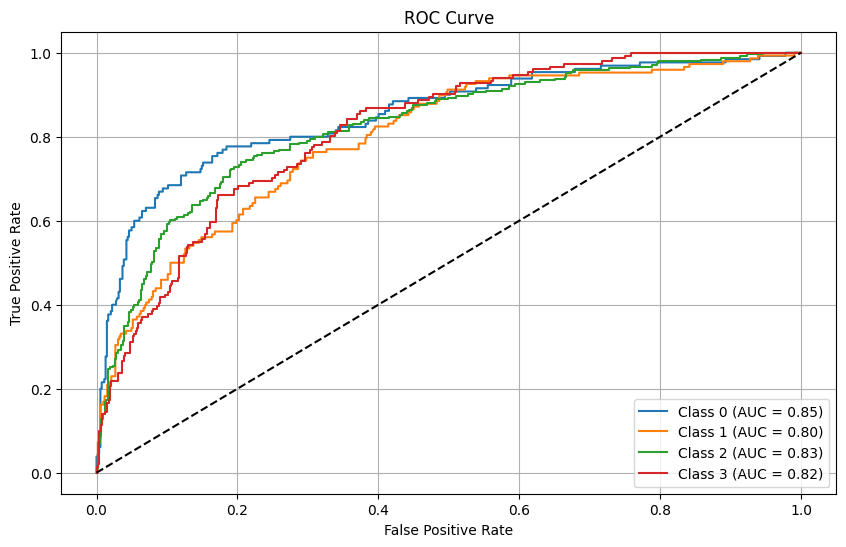

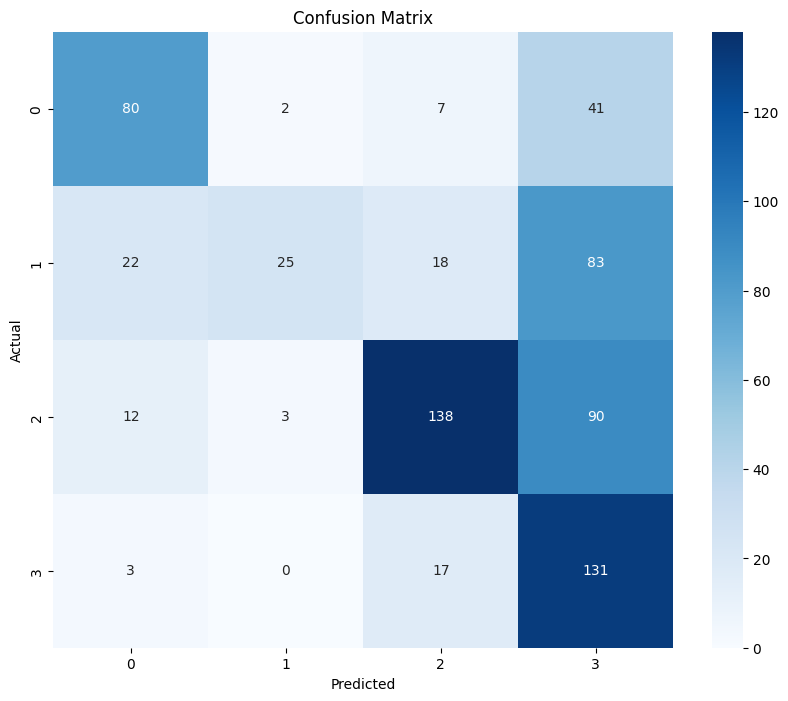

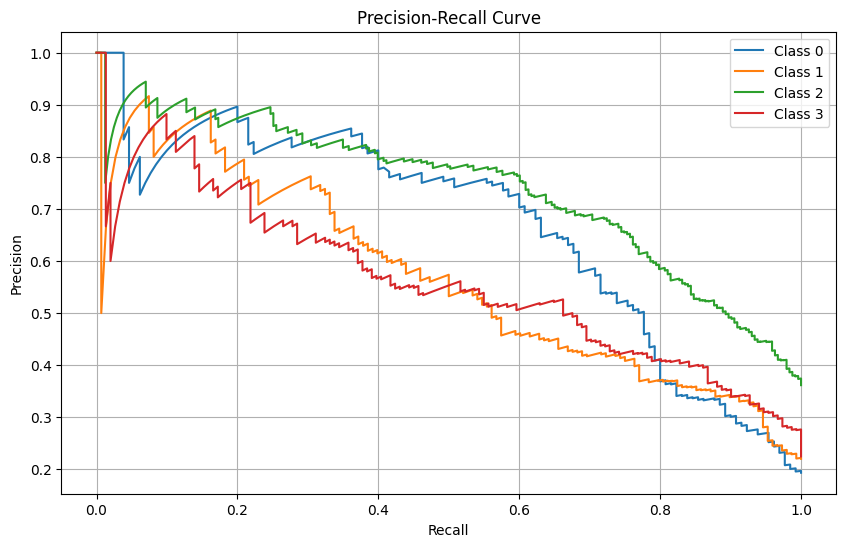

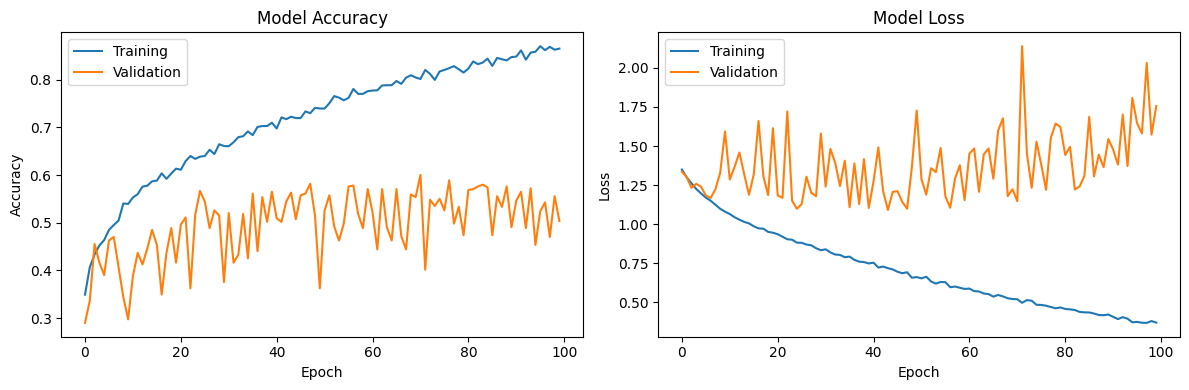


Final Model Performance:
Test Accuracy: 0.5565
F1 Score: 0.5418


In [12]:

# Generate predictions for visualization
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Convert labels for visualization
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes=4)

# Visualizations
def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


#EfficientNetB0

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the EfficientNetB0 model with transfer learning
input_shape = (224, 224, 3)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom CNN layers
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, Y_train,
                    validation_split=0.2,
                    epochs=70, batch_size=32, verbose=1)

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/70


KeyboardInterrupt: 

In [ ]:

# Generate predictions for visualization
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Convert labels for visualization
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes=4)

# Visualizations
def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


In [13]:
model.save('efficientnetb0.h5')

#End